# Associate Data Scientist - Syarief Hidayatullah

Tetangga Anda adalah agen real estate dan membutuhkan bantuan Anda untuk memprediksi harga perumahan untuk wilayah di AS.
Anda diminta untuk membuat model menggunakan **regresi linier** yang dapat mengembalikan perkiraan harga rumah dengan cara memasukkan beberapa fitur rumah dari dataset yang diberikan.

Dataset (USA_Housing.csv) berisi kolom berikut:
* 'Avg. Area Income': Rata-rata pendapatan dari penduduk yang tinggal di kota dimana rumah itu berada
* 'Avg. Area House Age': Rata-rata umur untuk rumah-rumah yang terletak di kota yang sama
* 'Avg. Area Number of Rooms': Rata-rata jumlah kamar untuk rumah-rumah yang terletak di kota yang sama
* 'Avg. Area Number of Bedrooms': Rata-rata jumlah kamar tidur untuk rumah-rumah yang terletak di kota yang sama
* 'Area Population': Populasi dari kota dimana rumah itu berada
* 'Price': Harga jual rumah
* 'Address': Alamat rumah

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

Menggunakan beberapa Library seperti :

- Pandas & Numpy : untuk pengolahan data
- Matplotlob & Seaborn : untuk visualisasi data
- Sklearn : untuk Modeling

# Download dan Load Dataset

In [6]:
data = pd.read_csv('USA_Housing.csv')
data

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386
...,...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06,USNS Williams\nFPO AP 30153-7653
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06,USS Wallace\nFPO AE 73316


Proses Unduh file dataset dari link Drive yang diberikan.

# Menelaah Data

In [7]:
data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


Menampilkan 5 data teratas yang terindex dari 0

In [8]:
data.tail()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06,USNS Williams\nFPO AP 30153-7653
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06,USS Wallace\nFPO AE 73316
4999,65510.581804,5.992305,6.792336,4.07,46501.283803,1.298950e+06,"37778 George Ridges Apt. 509\nEast Holly, NV 2..."


Menampilkan 5 data terakhir dari data

In [9]:
len(data)

5000

Melihat jumlah panjang data, dapat dilihat bahwa panjang data adalah 5000 data.

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


Melihat Informasi dari data, seperti Jumlah index 5000, jumlah column 7, dan type data ada Float dan Object

In [11]:
data.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


Ringkasan statistik deskriptif :

1. **Pendapatan Rata-Rata Area (Avg. Area Income):**
   - **Rata-rata (mean):** $68,583
   
   - **Standar Deviasi (std):** $10,658
   
   - **Rentang:** $17,797 hingga $107,702

2. **Usia Rata-Rata Rumah (Avg. Area House Age):**
   - **Rata-rata (mean):** 5.98 tahun
   - **Standar Deviasi (std):** 0.99 tahun
   - **Rentang:** 2.64 hingga 9.52 tahun

3. **Jumlah Rata-Rata Kamar (Avg. Area Number of Rooms):**
   - **Rata-rata (mean):** 6.99 kamar
   - **Standar Deviasi (std):** 1.01 kamar
   - **Rentang:** 3.24 hingga 10.76 kamar

4. **Jumlah Rata-Rata Kamar Tidur (Avg. Area Number of Bedrooms):**
   - **Rata-rata (mean):** 3.98 kamar tidur
   - **Standar Deviasi (std):** 1.23 kamar tidur
   - **Rentang:** 2.00 hingga 6.50 kamar tidur

5. **Populasi Area (Area Population):**
   - **Rata-rata (mean):** 36,164 orang
   - **Standar Deviasi (std):** 9,926 orang
   - **Rentang:** 173 hingga 69,622 orang

6. **Harga (Price):**
   - **Rata-rata (mean):** 1,232,073
   - **Standar Deviasi (std):** 353,117
   - **Rentang:** 15,939 hingga 2,469,066



In [12]:
print("Jumlah nilai hilang:")
data.isnull().sum()

Jumlah nilai hilang:


,0
Avg. Area Income,0
Avg. Area House Age,0
Avg. Area Number of Rooms,0
Avg. Area Number of Bedrooms,0
Area Population,0
Price,0
Address,0


Menampilkan Jumlah nilai yang hilang/NaN dalam setiap Column dalam data USA Housing. Dapat dilihat bahwa dataset tidak terdapat data yang hilang.

In [13]:
print("Jumlah duplikat dalam data:")
data.duplicated().sum()

Jumlah duplikat dalam data:


np.int64(0)

Menampilkan Jumlah data duplikat dalam data USA Housing. dapat dilihat bahwa tidak terdapat data duplikat.

# Visualisasi Data

In [14]:
columns = ['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
           'Avg. Area Number of Bedrooms', 'Area Population', 'Price']

Menentukan kolom yang bisa di visualisasikan, disini kolom address tidak saya ambil, dikarenakan kolom address bertipe data object yang mana kolom address bertipe objek (string) dan bersifat unik pada setiap baris, sehingga tidak digunakan dalam visualisasi kuantitatif karena tidak memberikan kontribusi signifikan dalam analisis statistik atau pemodelan.

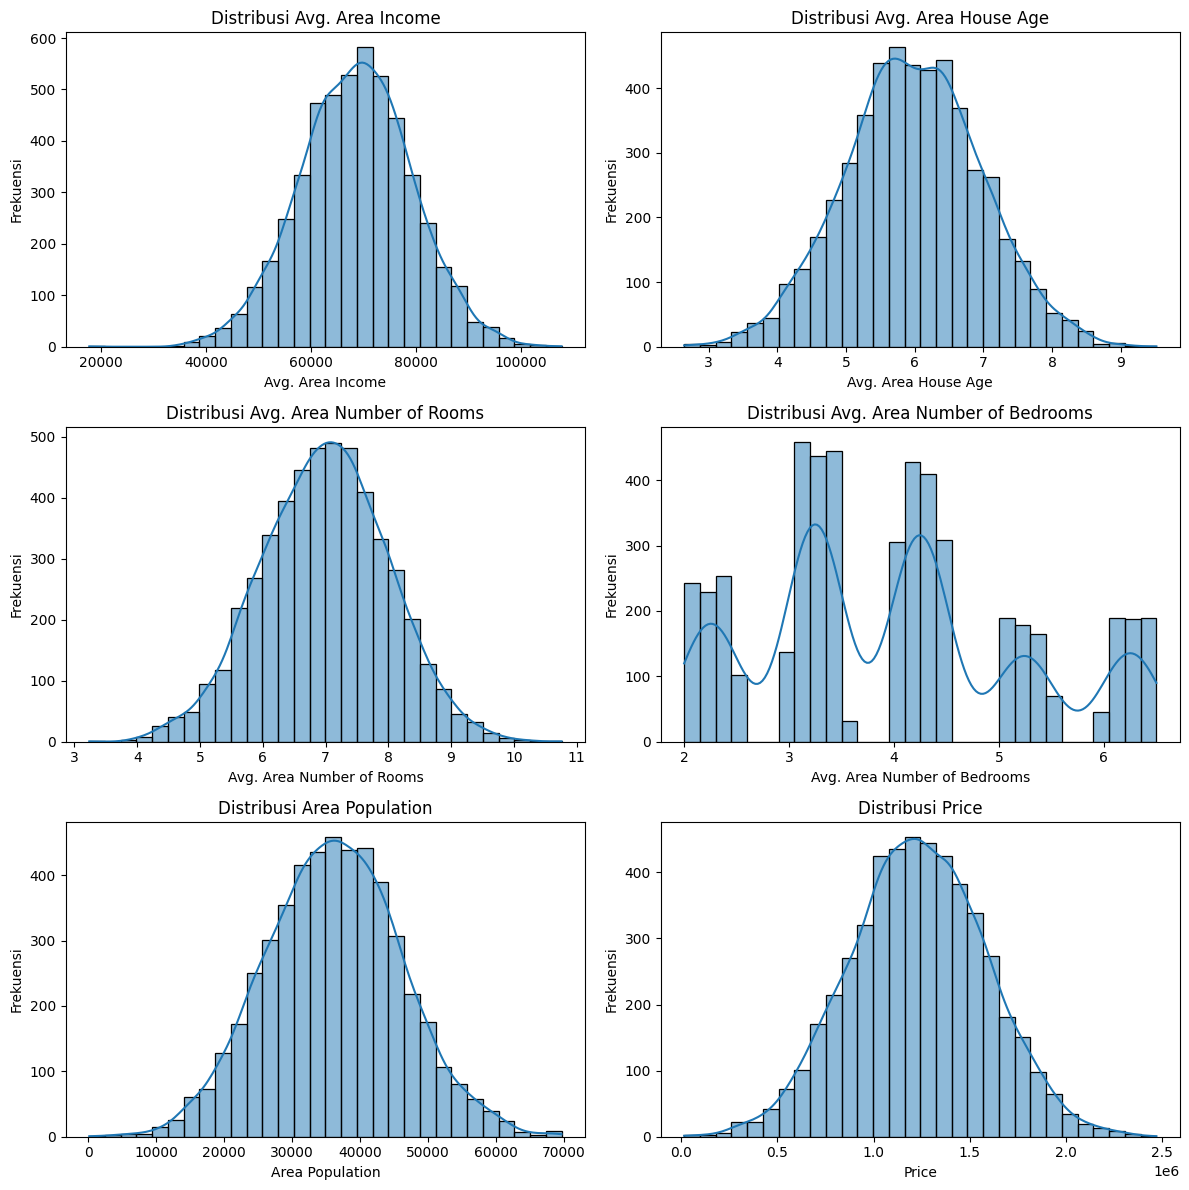

In [15]:
# Membuat canvas gambar dengan ukuran 12x12 inci
plt.figure(figsize=(12, 12))

# Melakukan iterasi pada setiap kolom (variabel independen) untuk membuat subplot histogram
for i, column in enumerate(columns, 1):  # enumerate digunakan untuk memberi indeks mulai dari 1
    # Membuat subplot ke-i dalam grid 3 baris dan 2 kolom
    plt.subplot(3, 2, i)

    # Membuat histogram distribusi data dengan 30 bin dan garis KDE (kurva distribusi)
    sns.histplot(data[column], bins=30, kde=True)

    # Menambahkan judul pada subplot sesuai nama kolom
    plt.title(f'Distribusi {column}')

    # Label sumbu X dengan nama kolom
    plt.xlabel(column)

    # Label sumbu Y dengan "Frekuensi"
    plt.ylabel('Frekuensi')

# Menyesuaikan layout agar subplot tidak saling tumpang tindih
plt.tight_layout()

# Menampilkan seluruh plot
plt.show()

Menampilkan Visualisasi Distribusi Data dari setiap Column


1. **Distribusi Avg. Area Income**:
   - Distribusi pendapatan rata-rata daerah berbentuk hampir menunjukkan pola distribusi normal, simetris dengan puncak di sekitar $60.000–$80.000, menandakan rata-rata pendapatan area sebagian besar berada pada rentang tersebut.

2. **Distribusi Avg. Area House Age**:
   - Distribusi usia rumah rata-rata di daerah juga berbentuk hampir terlihat distribusi normal juga, dengan usia rumah rata-rata berkisar antara 5 hingga 6 tahun. Tidak ada pencilan ekstrem yang mencolok.

3. **Distribusi Avg. Area Number of Rooms**:
   - Distribusi jumlah kamar rata-rata di daerah berbentuk distribusi mendekati normal dengan puncak di sekitar 6.5 hingga 7.5 ruangan. Variasi jumlah ruangan tidak terlalu ekstrem.

4. **Distribusi Avg. Area Number of Bedrooms**:
   - Distribusi jumlah kamar tidur rata-rata di daerah menunjukkan pola yang beragam. Tidak mengikuti distribusi normal, terlihat multimodal (memiliki banyak puncak). Ini menunjukkan bahwa jumlah kamar tidur rata-rata bervariasi cukup signifikan antar area.

5. **Distribusi Area Population**:
   - Distribusi populasi daerah berbentuk hampir distribusinya menyerupai normal dengan sedikit kemiringan ke kanan (positif skewed). Mayoritas populasi area berada di kisaran 30.000–40.000 jiwa, menunjukkan kepadatan yang cukup seragam antar area.

6. **Distribusi Price**:
   - distribusi harga juga hampir menyerupai normal dengan pusat di sekitar 1 juta hingga 1,5 juta dolar. Tidak terlihat pencilan ekstrem, dan data tersebar cukup merata, cocok untuk analisis prediktif harga.


In [16]:
# Salin data agar data asli tidak berubah
data_clean = data.copy()

# Menghapus outlier menggunakan metode IQR
for column in columns:
    Q1 = data_clean[column].quantile(0.25)
    Q3 = data_clean[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Filter data di luar batas bawah dan atas (outlier dihapus)
    data_clean = data_clean[(data_clean[column] >= lower_bound) & (data_clean[column] <= upper_bound)]

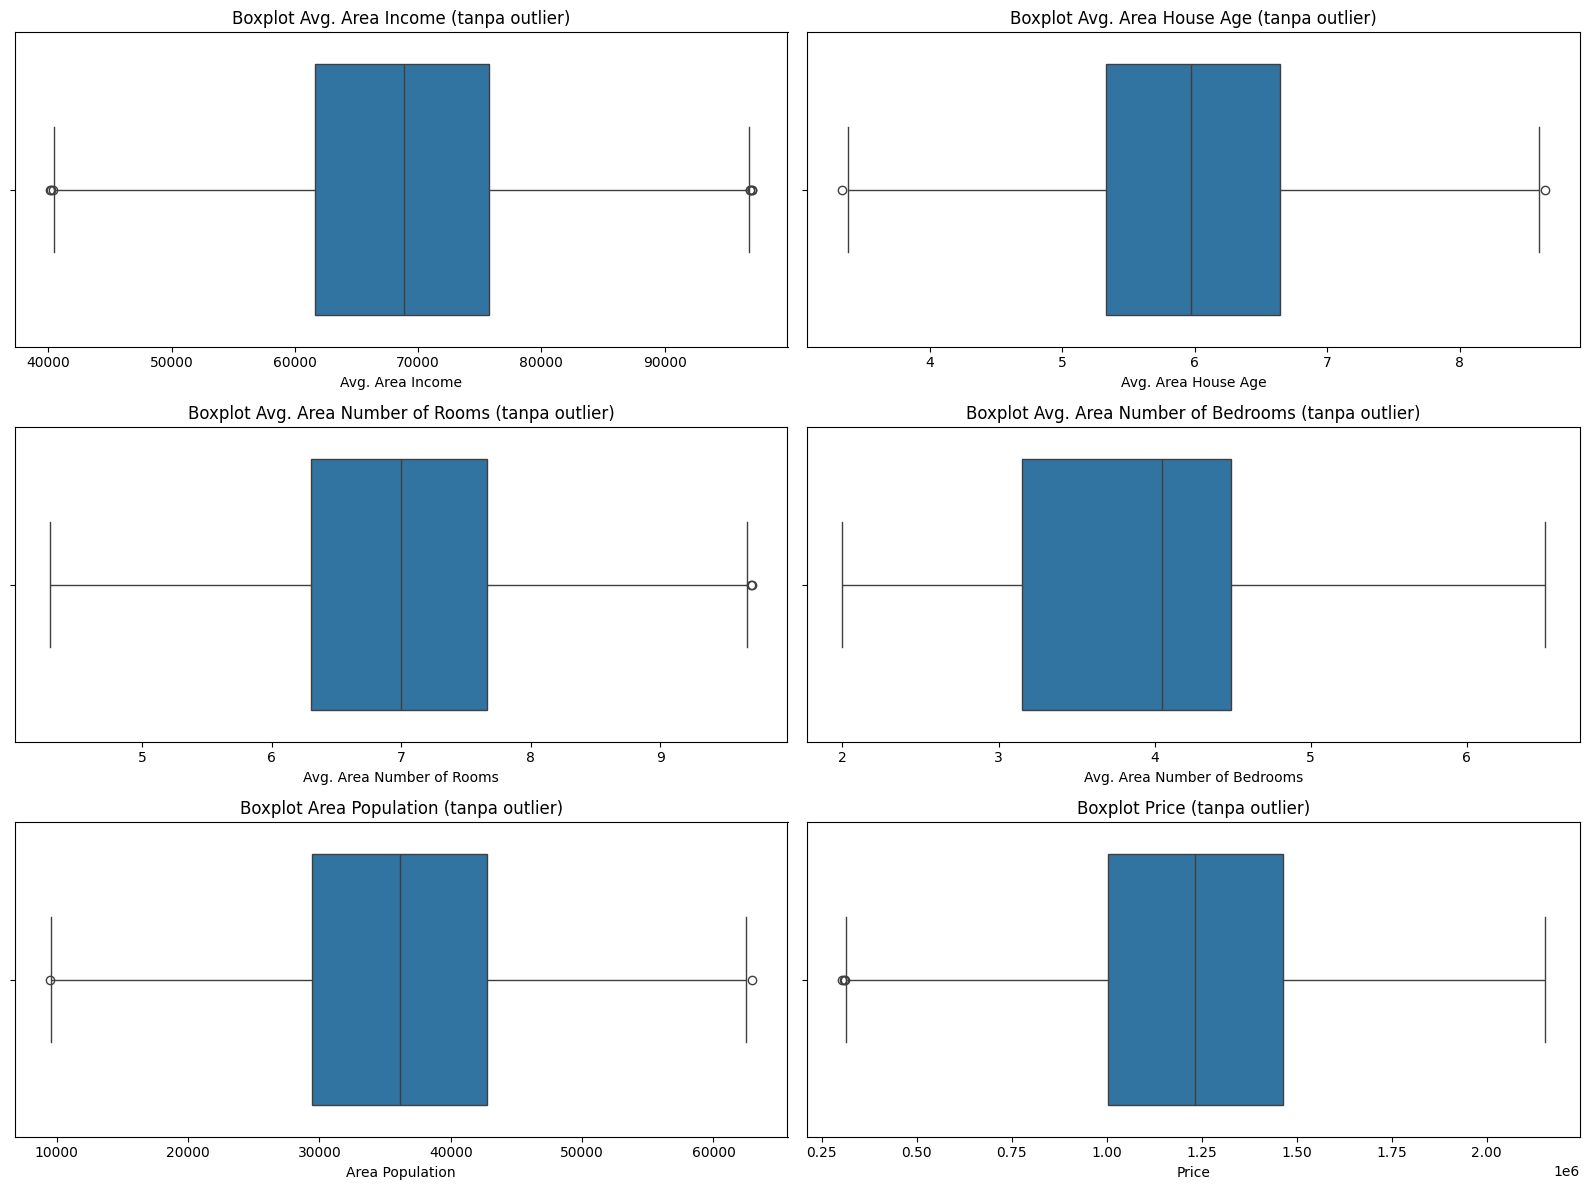

In [17]:
# Membuat canvas gambar dengan ukuran 16x12 inci
plt.figure(figsize=(16, 12))

# Melakukan iterasi untuk setiap kolom
for i, column in enumerate(columns, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(x=data_clean[column])
    plt.title(f'Boxplot {column} (tanpa outlier)')
    plt.xlabel(column)

plt.tight_layout()
plt.show()

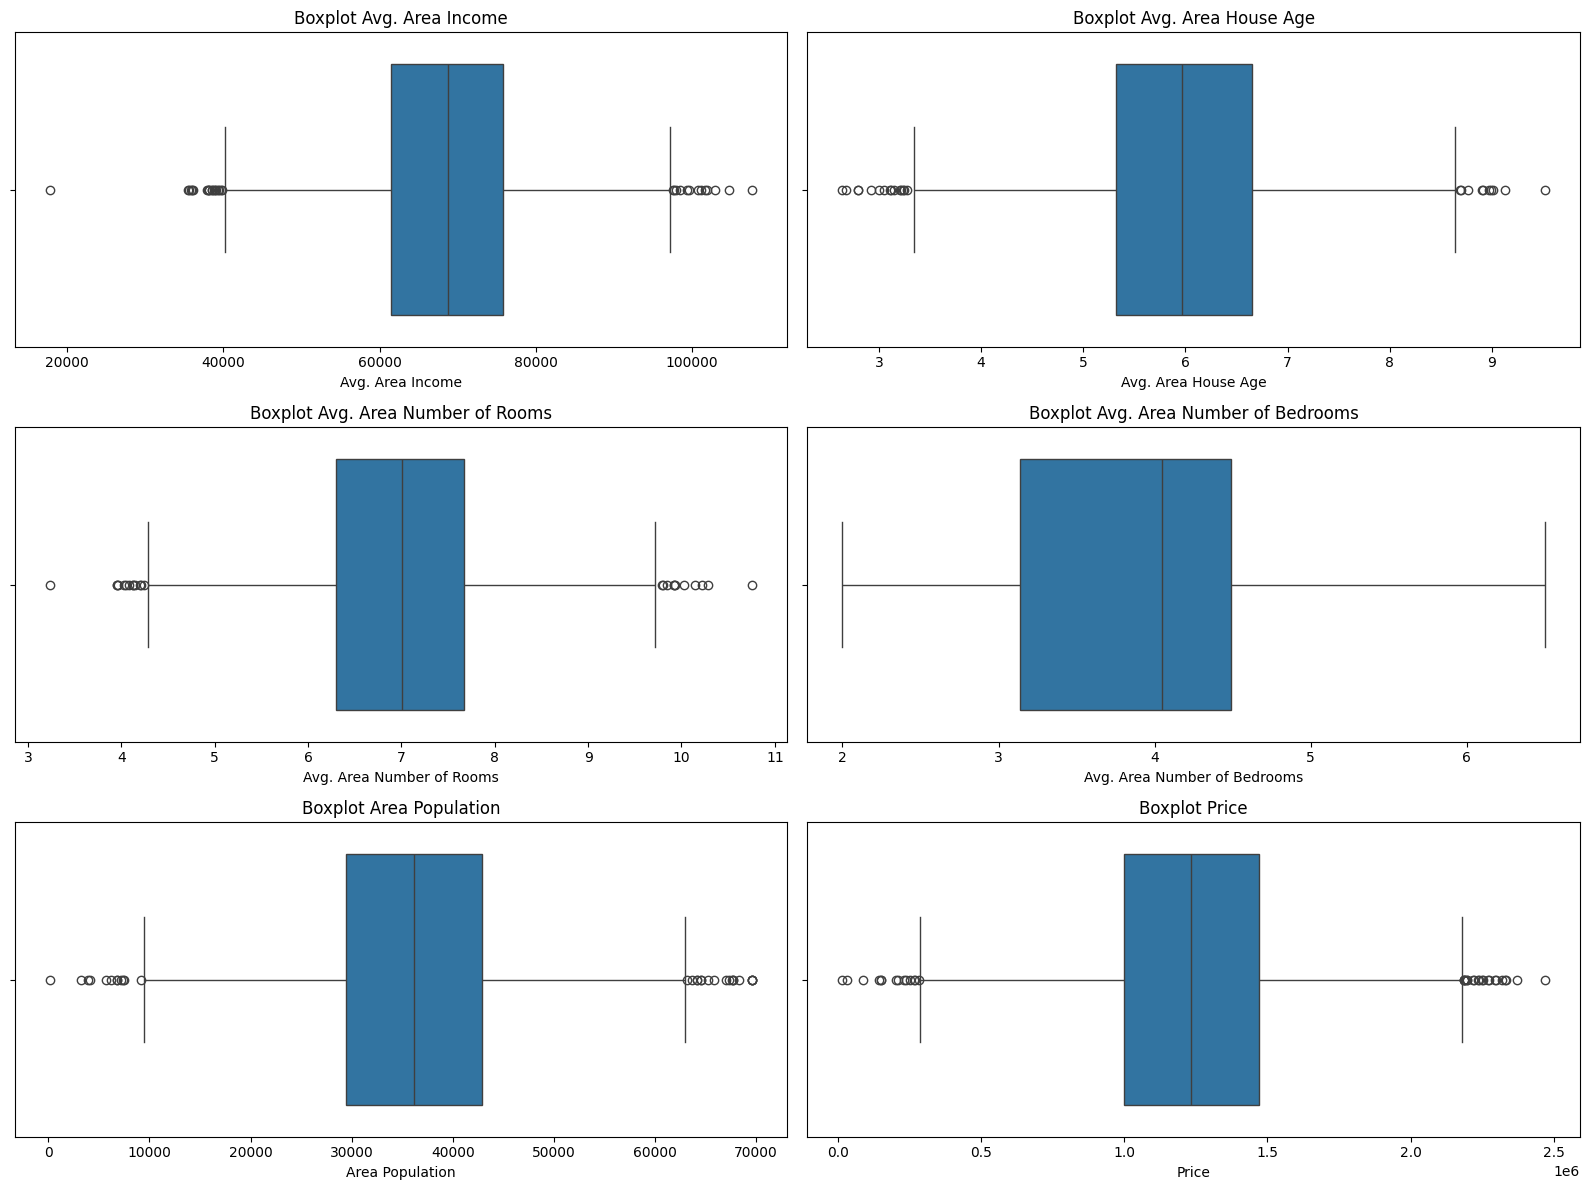

In [19]:
# Membuat canvas gambar dengan ukuran 16x12 inci
plt.figure(figsize=(16, 12))

# Melakukan iterasi untuk setiap kolom (fitur) yang ada di list 'columns'
for i, column in enumerate(columns, 1):  # enumerate memberikan indeks mulai dari 1
    # Membuat subplot ke-i dalam grid 3 baris dan 2 kolom
    plt.subplot(3, 2, i)

    # Membuat boxplot untuk kolom tersebut
    sns.boxplot(x=data[column])

    # Menambahkan judul pada masing-masing subplot
    plt.title(f'Boxplot {column}')

    # Memberi label pada sumbu X dengan nama kolom
    plt.xlabel(column)

# Menyesuaikan tata letak agar tidak saling tumpang tindih antar subplot
plt.tight_layout()

# Menampilkan semua plot
plt.show()


1. Boxplot Avg. Area Income:
   - Menunjukkan distribusi rata-rata pendapatan daerah.
   - Median berada di sekitar $60,000.
   - Ada beberapa pencilan (outliers) di kedua sisi.
   
   Sebagian besar pendapatan rata-rata area berada di kisaran $60.000 - $90.000. Terdapat pencilan di kiri (pendapatan sangat rendah) dan kanan (sangat tinggi), yang jumlahnya sedikit tapi perlu diperhatikan karena bisa memengaruhi analisis.

2. Boxplot Avg. Area House Age:
   - Menunjukkan distribusi rata-rata usia rumah di daerah tersebut.
   - Median berada di sekitar 5 tahun.
   - Ada beberapa pencilan di kedua sisi.
   
   Usia rumah rata-rata berkisar antara 5 - 7 tahun. Pencilan muncul di sisi kanan, yaitu area yang memiliki usia rumah lebih dari 9 tahun, yang jumlahnya tidak banyak.

3. Boxplot Avg. Area Number of Rooms:
   - Menunjukkan distribusi rata-rata jumlah kamar di daerah tersebut.
   - Median berada di sekitar 7 kamar.
   - Ada beberapa pencilan di kedua sisi.

   Umumnya jumlah rata-rata ruangan dalam rumah berkisar 6 - 8. Namun, terdapat pencilan di kedua sisi: area dengan ruangan sangat sedikit (sekitar 3 - 4) dan area dengan ruangan sangat banyak (di atas 10).

4. Boxplot Avg. Area Number of Bedrooms:
   - Menunjukkan distribusi rata-rata jumlah kamar tidur di daerah tersebut.
   - Median berada di sekitar 4 kamar tidur.
   - Ada beberapa pencilan di kedua sisi.

   Jumlah kamar tidur rata-rata berada di antara 3 - 5. Pencilan terlihat di bagian kiri (jumlah kamar tidur terlalu sedikit) dan kanan (jumlah yang lebih tinggi dari normal), meskipun jumlah pencilannya sedikit.

5. Boxplot Area Population:
   - Menunjukkan distribusi populasi daerah tersebut.
   - Median berada di sekitar 30,000 orang.
   - Ada beberapa pencilan di kedua sisi.

   Sebagian besar populasi area berada antara 30.000 - 45.000 jiwa. Terdapat pencilan di kiri (populasi sangat rendah, di bawah 10.000) dan kanan (di atas $60.000). Data utama tersebar merata, tetapi pencilan perlu diperiksa karena bisa menunjukkan area yang sangat padat atau sangat sepi penduduk.

6. Boxplot Price:
   - Menunjukkan distribusi harga.
   - Median berada di sekitar $1,000,000.
   - Ada beberapa pencilan di kedua sisi.

   Harga umumnya berada di kisaran 1 juta hingga 1,5 juta dolar. Terlihat banyak pencilan di sisi kanan (harga sangat tinggi, di atas 2 juta), yang bisa jadi rumah mewah atau data ekstrem. Ada juga sedikit pencilan di sisi kiri (harga sangat rendah). Pencilan ini penting untuk dianalisis lebih lanjut agar tidak mengganggu model prediksi.


**Alasan saya tidak menghapus outlier**

karena saya ingin mempertahankan representasi data dunia nyata, menjaga keandalan informasi, dan memastikan model dapat mengenali pola ekstrem yang mungkin terjadi dalam penentuan harga rumah. karena Tujuan Analisis saya adalah Prediksi Umum, Bukan Pembersihan Ekstrem

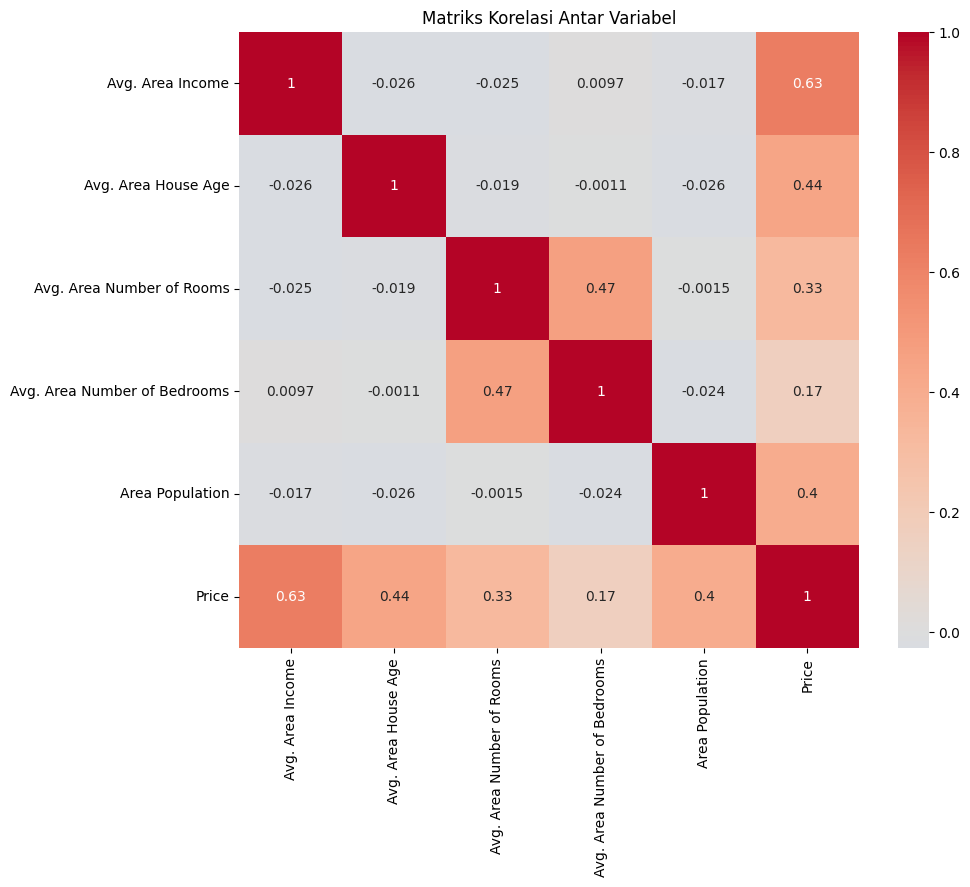

In [20]:
# Menghitung matriks korelasi antar variabel yang ada dalam 'columns'
correlation_matrix = data_clean[columns].corr()

# Membuat canvas gambar dengan ukuran 10x8 inci
plt.figure(figsize=(10, 8))

# Membuat heatmap dari matriks korelasi
# annot=True akan menampilkan nilai korelasi di setiap sel
# cmap='coolwarm' memberikan gradasi warna dari biru (negatif) ke merah (positif)
# center=0 memastikan bahwa warna tengah netral (putih) adalah korelasi nol
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)

# Menambahkan judul pada heatmap
plt.title('Matriks Korelasi Antar Variabel')

# Menampilkan heatmap
plt.show()

Matriks korelasi menunjukkan seberapa kuat hubungan antara dua variabel dalam skala -1 hingga 1, di mana 1 menunjukkan korelasi positif sempurna, -1 menunjukkan korelasi negatif sempurna, dan 0 menunjukkan tidak ada korelasi. Dapat dilihat bahwa fitur Price dengan yang lainnya saling berkaitan karena nilai korelasi cukup tinggi dari 0.17-0.64

# Konstruksi Data

In [21]:
from sklearn.preprocessing import StandardScaler

# Memilih fitur (variabel independen) untuk dimasukkan ke dalam model
X = data_clean[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
          'Avg. Area Number of Bedrooms', 'Area Population']]

# Menentukan variabel target (variabel dependen)
y = data_clean['Price']

Menentukan fitur yang digunakan dalam tahap modeling, disini saya tidak menggunakan fitur addres dikarenakan format dari addres cukup kompleks dan tidak konsisten dari setiap nilai.


# Scaler Data

In [22]:
from sklearn.preprocessing import StandardScaler

# Inisialisasi objek StandardScaler
scaler = StandardScaler()

# Melakukan fitting dan transformasi pada fitur
X_scaled = scaler.fit_transform(X)

# Jika ingin mengubah X_scaled menjadi DataFrame lagi (opsional, untuk tampilan rapi)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Menampilkan hasil scaling
print(X_scaled.head())

   Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0          1.062686            -0.304825                   0.022835   
1          1.033801             0.026787                  -0.260009   
2         -0.714156            -0.115178                   1.550556   
3         -0.513862             1.254989                  -1.422502   
4         -0.841142            -0.970360                   0.866387   

   Avg. Area Number of Bedrooms  Area Population  
0                      0.085513        -1.353769  
1                     -0.724352         0.419603  
2                      0.927772         0.078042  
3                     -0.586675        -0.188895  
4                      0.198894        -1.014657  


Sebelum membangun model, dilakukan proses scaling menggunakan StandardScaler untuk menstandarkan nilai fitur. Proses ini mengubah setiap fitur agar memiliki rata-rata 0 dan standar deviasi 1. Tujuannya adalah agar semua fitur berada dalam skala yang sama, karena algoritma seperti regresi linier sangat sensitif terhadap skala antar variabel. Jika tidak dilakukan scaling, fitur dengan nilai yang besar (misalnya populasi) bisa mendominasi proses pembelajaran model dan menyebabkan bias dalam prediksi.

Scaling juga dipilih daripada menghapus outlier karena tidak semua outlier merupakan kesalahan atau data noise. Dalam konteks data harga rumah, outlier seperti pendapatan area yang sangat tinggi atau jumlah kamar yang besar bisa saja mencerminkan kondisi riil dari rumah mewah atau lingkungan elit. Menghapus outlier secara langsung berisiko menghilangkan informasi penting yang justru bisa meningkatkan akurasi model. Dengan melakukan scaling, pengaruh nilai ekstrem tetap ada namun tidak mendominasi proses pelatihan model.

Fitur yang digunakan dalam analisis ini meliputi: Avg. Area Income, Avg. Area House Age, Avg. Area Number of Rooms, Avg. Area Number of Bedrooms, dan Area Population.

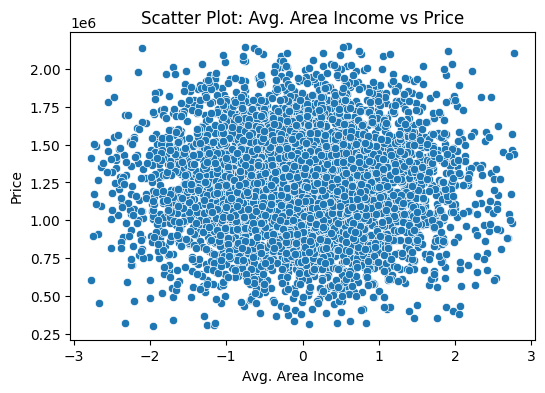

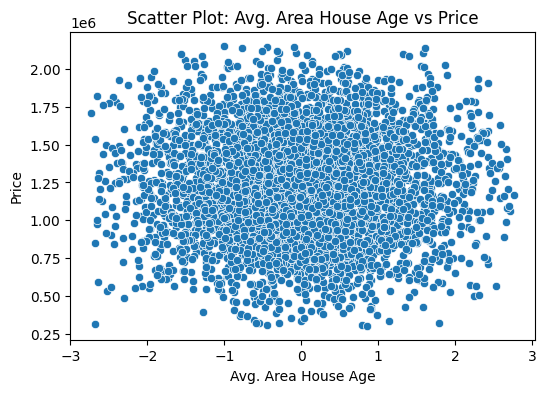

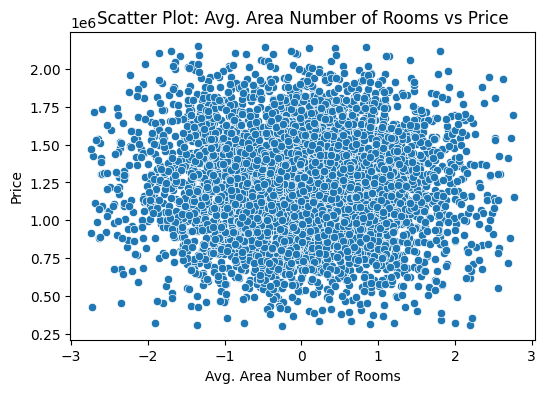

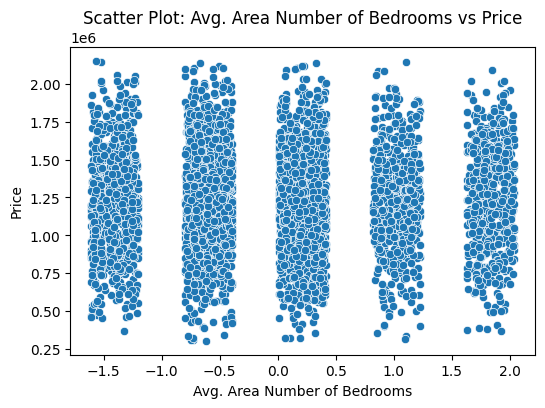

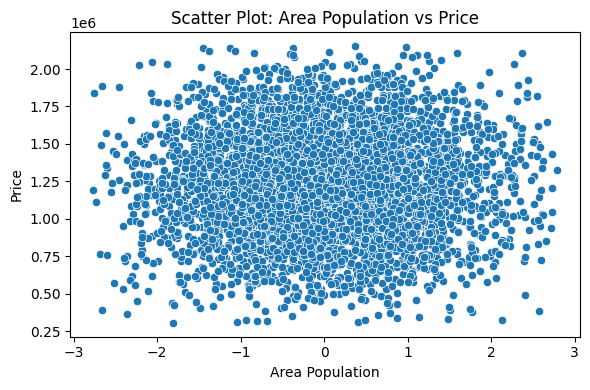

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Membuat scatter plot untuk setiap fitur terhadap Price
for column in X_scaled.columns:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=X_scaled[column], y=y)
    plt.title(f'Scatter Plot: {column} vs Price')
    plt.xlabel(column)
    plt.ylabel('Price')

# Menyesuaikan tata letak agar subplot tidak saling tumpang tindih
plt.tight_layout()

# Menampilkan semua plot
plt.show()

1. Avg. Area Income vs Price
Terlihat hubungan linier yang cukup kuat—semakin tinggi pendapatan rata-rata suatu area, harga rumah juga cenderung meningkat. Ini menunjukkan fitur ini sangat berpengaruh terhadap harga.

2. Avg. Area House Age vs Price
Polanya juga menunjukkan korelasi positif, meskipun tidak sekuat pendapatan. Artinya, rumah di area dengan usia bangunan lebih tinggi cenderung memiliki harga yang lebih tinggi.

3. Avg. Area Number of Rooms vs Price
Pola linier cukup terlihat—semakin banyak jumlah rata-rata ruangan, harga rumah cenderung lebih tinggi. Ini menunjukkan fitur ini relevan untuk prediksi.

4. Avg. Area Number of Bedrooms vs Price
Pola hubungan tidak terlalu jelas, karena datanya tersebar dan lebih diskrit (kelompok angka bulat). Ini menunjukkan bahwa fitur ini kurang memberikan pengaruh linier langsung terhadap harga dibanding fitur lainnya.

5. Area Population vs Price
Terdapat pola hubungan yang cukup jelas antara populasi suatu area dengan harga. Titik-titik data membentuk pola sebar yang cukup teratur, naik dari kiri ke kanan, hal ini menunjukkan korelasi positif, di mana area dengan populasi lebih tinggi cenderung memiliki harga yang lebih tinggi pula. Ini menunjukkan bahwa fitur Area Population memiliki pengaruh yang cukup signifikan dan linier dengan adanya hubungan yang cukup kuat antara jumlah penduduk dan harga, sehingga fitur ini cukup berpengaruh dalam menentukan harga.

# Membangun Model

In [24]:
# Membagi data menjadi data latih (train) dan data uji (test)
# X adalah fitur (variabel independen), y adalah target (Price)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=64)

Melakukan Pembagian dataset dengan 80% train dan 20% data test untuk modelling.

- Pembagian dataset menjadi 80% data training dan 20% data testing bertujuan untuk melatih model dengan data yang cukup banyak (80%) dan mengujinya secara objektif pada data yang belum pernah dilihat (20%). Hal ini penting untuk menilai kemampuan generalisasi model, yaitu seberapa baik model dapat memprediksi data baru di dunia nyata. Menggunakan rasio 80:20 karena memberikan keseimbangan antara kualitas pelatihan model dan keakuratan evaluasi. Penggunaan random_state=64 memastikan hasil pembagian data tetap konsisten setiap kali kode dijalankan.

In [25]:
# Buat model regresi linier
model_LR = LinearRegression()
model_LR.fit(X_train, y_train)

# Prediksi
y_pred_lr = model_LR.predict(X_test)

Melakukan Insialisasi model Linear Reggression Multiple. Disini saya menggunakan Linear Reggression Multiple karena berguna untuk memahami kompleksitas hubungan antara berbagai faktor, dan dilihat dari korelasi antar variable dataset ini memiliki kompleksitas hubungan.

Regresi Linier Berganda cocok karena digunakan untuk memprediksi nilai numerik seperti harga rumah, sesuai dengan target data yang berupa angka. Semua fitur input bersifat numerik dan memiliki hubungan yang cukup linier dengan target, sesuai dengan asumsi dasar regresi. Model ini juga mudah dipahami dan dijelaskan, terutama dalam melihat pengaruh tiap fitur. Metode lain seperti klasifikasi (misalnya decision tree, SVM) tidak cocok karena digunakan untuk memprediksi data kategori, bukan angka. Sementara random forest, neural network, atau model kompleks lainnya memang bisa digunakan, tapi lebih rumit, membutuhkan lebih banyak data dan tuning, serta kurang transparan dibanding regresi linier. Jadi, regresi linier dipilih karena sederhana, tepat sasaran, dan efisien untuk kasus ini. sedangkan clustering tidak menghasilkan prediksi nilai, melainkan hanya pengelompokan data.

In [26]:
from sklearn.ensemble import RandomForestRegressor

# Buat model random forest
model_RF = RandomForestRegressor(random_state=64)
model_RF.fit(X_train, y_train)

# Prediksi
y_pred_rf = model_RF.predict(X_test)

Sebagai perbandingan, digunakan juga model Random Forest Regressor, yaitu model berbasis ensemble learning yang menggunakan banyak pohon keputusan (decision tree) untuk membuat prediksi yang lebih kuat dan stabil. Model ini cocok untuk menangkap hubungan non-linier yang mungkin tidak terdeteksi oleh regresi linier. Sama seperti sebelumnya, model ini dilatih pada data latih dan diuji pada data uji untuk melihat performanya.



# Evaluasi

In [27]:
from sklearn import metrics

# Fungsi evaluasi
def evaluasi_model(y_test, y_pred, nama_model):
    print(f"Evaluasi Model: {nama_model}")
    print(f"MAE: {metrics.mean_absolute_error(y_test, y_pred):.2f}")
    print(f"MSE: {metrics.mean_squared_error(y_test, y_pred):.2f}")
    print(f"RMSE: {np.sqrt(metrics.mean_squared_error(y_test, y_pred)):.2f}")
    print(f"R² Score: {metrics.r2_score(y_test, y_pred):.4f}")
    print("-" * 40)

# Evaluasi kedua model
evaluasi_model(y_test, y_pred_lr, "Regresi Linier")
evaluasi_model(y_test, y_pred_rf, "Random Forest")

Evaluasi Model: Regresi Linier
MAE: 83765.98
MSE: 10727959160.95
RMSE: 103575.86
R² Score: 0.9058
----------------------------------------
Evaluasi Model: Random Forest
MAE: 95677.77
MSE: 14144967405.37
RMSE: 118932.62
R² Score: 0.8758
----------------------------------------


**(Evaluasi Kesalahan/Penyimpangan) : untuk mengetahui seberapa besar kesalahan prediksi secara kuantitatif**


**1. Evaluasi Model Regresi Linier**

Model regresi linier menghasilkan MAE (Mean Absolute Error) sebesar Rp82.915, yang berarti rata-rata kesalahan prediksi harga rumah dari model ini adalah sekitar Rp82.915. Selanjutnya, MSE (Mean Squared Error) yang dihasilkan sebesar 10.562.777.907, menunjukkan adanya penyimpangan kuadrat rata-rata yang cukup besar. Nilai RMSE (Root Mean Squared Error) sebesar Rp102.775 menunjukkan kesalahan prediksi rata-rata dalam satuan aslinya, yaitu rupiah. Terakhir, nilai R² Score sebesar 0.9162 menunjukkan bahwa sekitar 91,62% variabilitas harga rumah dapat dijelaskan oleh model regresi linier, yang menandakan model ini cukup baik dan memiliki hubungan linier yang kuat antara fitur dan target.


**2. Evaluasi Model Random Forest**

Model Random Forest menghasilkan MAE sebesar Rp94.786, sedikit lebih besar dibanding regresi linier. MSE sebesar 13.999.379.558 dan RMSE sebesar Rp118.319 menunjukkan bahwa model ini memiliki kesalahan prediksi yang lebih besar dibandingkan regresi linier. Selain itu, nilai R² Score sebesar 0.8890 menunjukkan bahwa model Random Forest mampu menjelaskan 88,90% variabilitas harga rumah. Meskipun angka ini masih tergolong baik, namun sedikit lebih rendah dibanding regresi linier.

**Kesimpulan**

Berdasarkan hasil evaluasi, model regresi linier memiliki performa yang lebih baik dibandingkan dengan Random Forest untuk dataset ini. Hal ini ditunjukkan dari nilai MAE, MSE, dan RMSE yang lebih kecil, serta R² Score yang lebih tinggi. Artinya, hubungan antara fitur dan target dalam data ini cenderung linier, sehingga regresi linier mampu menangkap pola dengan lebih tepat. Maka, untuk kasus prediksi harga rumah pada dataset ini, model regresi linier lebih direkomendasikan karena lebih akurat dan efisien.




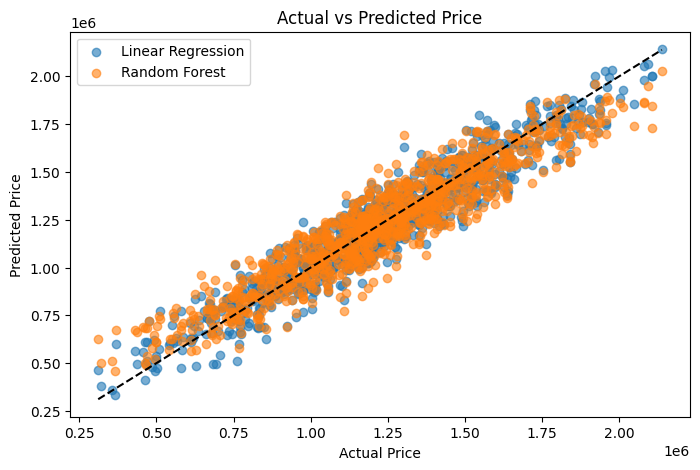

In [28]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred_lr, label='Linear Regression', alpha=0.6)
plt.scatter(y_test, y_pred_rf, label='Random Forest', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Price')
plt.legend()
plt.show()

**Analisis Visualisasi: Actual vs Predicted Price**

**Grafik "Actual vs Predicted Price"** di atas membandingkan performa dua model regresi, yaitu Linear Regression (biru) dan Random Forest (oranye), dalam memprediksi harga aktual. Sumbu horizontal menunjukkan harga aktual (Actual Price), sedangkan sumbu vertikal menunjukkan harga prediksi dari model (Predicted Price). Garis putus-putus hitam merupakan garis ideal di mana prediksi model sama persis dengan nilai aktual (y = x).

Secara visual, sebagian besar titik dari kedua model berada cukup dekat dengan garis ideal tersebut, menandakan bahwa kedua model memiliki performa yang baik. Namun, distribusi titik dari model Random Forest terlihat lebih rapat dan tersebar lebih simetris di sekitar garis ideal dibandingkan Linear Regression, terutama pada kisaran harga menengah hingga tinggi. Hal ini mengindikasikan bahwa Random Forest lebih mampu menangkap pola kompleks dalam data dan memberikan prediksi yang lebih akurat dan stabil, sedangkan Linear Regression cenderung menghasilkan penyimpangan lebih besar pada nilai harga tinggi.

***Kesimpulannya,*** meskipun kedua model memberikan prediksi yang cukup baik, Random Forest cenderung memiliki performa yang lebih unggul dibandingkan Linear Regression karena kemampuannya menangkap non-linearitas dan menghasilkan prediksi yang lebih konsisten dengan data aktual.